In [39]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# from geopy.distance import geodesic
from datetime import datetime

In [2]:
wholesale_df = pd.read_csv("raw_data\wholesale-customers.csv")

In [3]:
print("Train shape:", wholesale_df.shape)
print("Train columns:", wholesale_df.columns)

Train shape: (440, 8)
Train columns: Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [4]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# check the distribution of the categorical columns
wholesale_df.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [6]:
# check the distribution of the numerical columns
wholesale_df.select_dtypes(exclude='object').nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [7]:
# descriptive statistics central tendency, dispersion shape of distribution
wholesale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [11]:
wholesale_df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [12]:
wholesale_df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

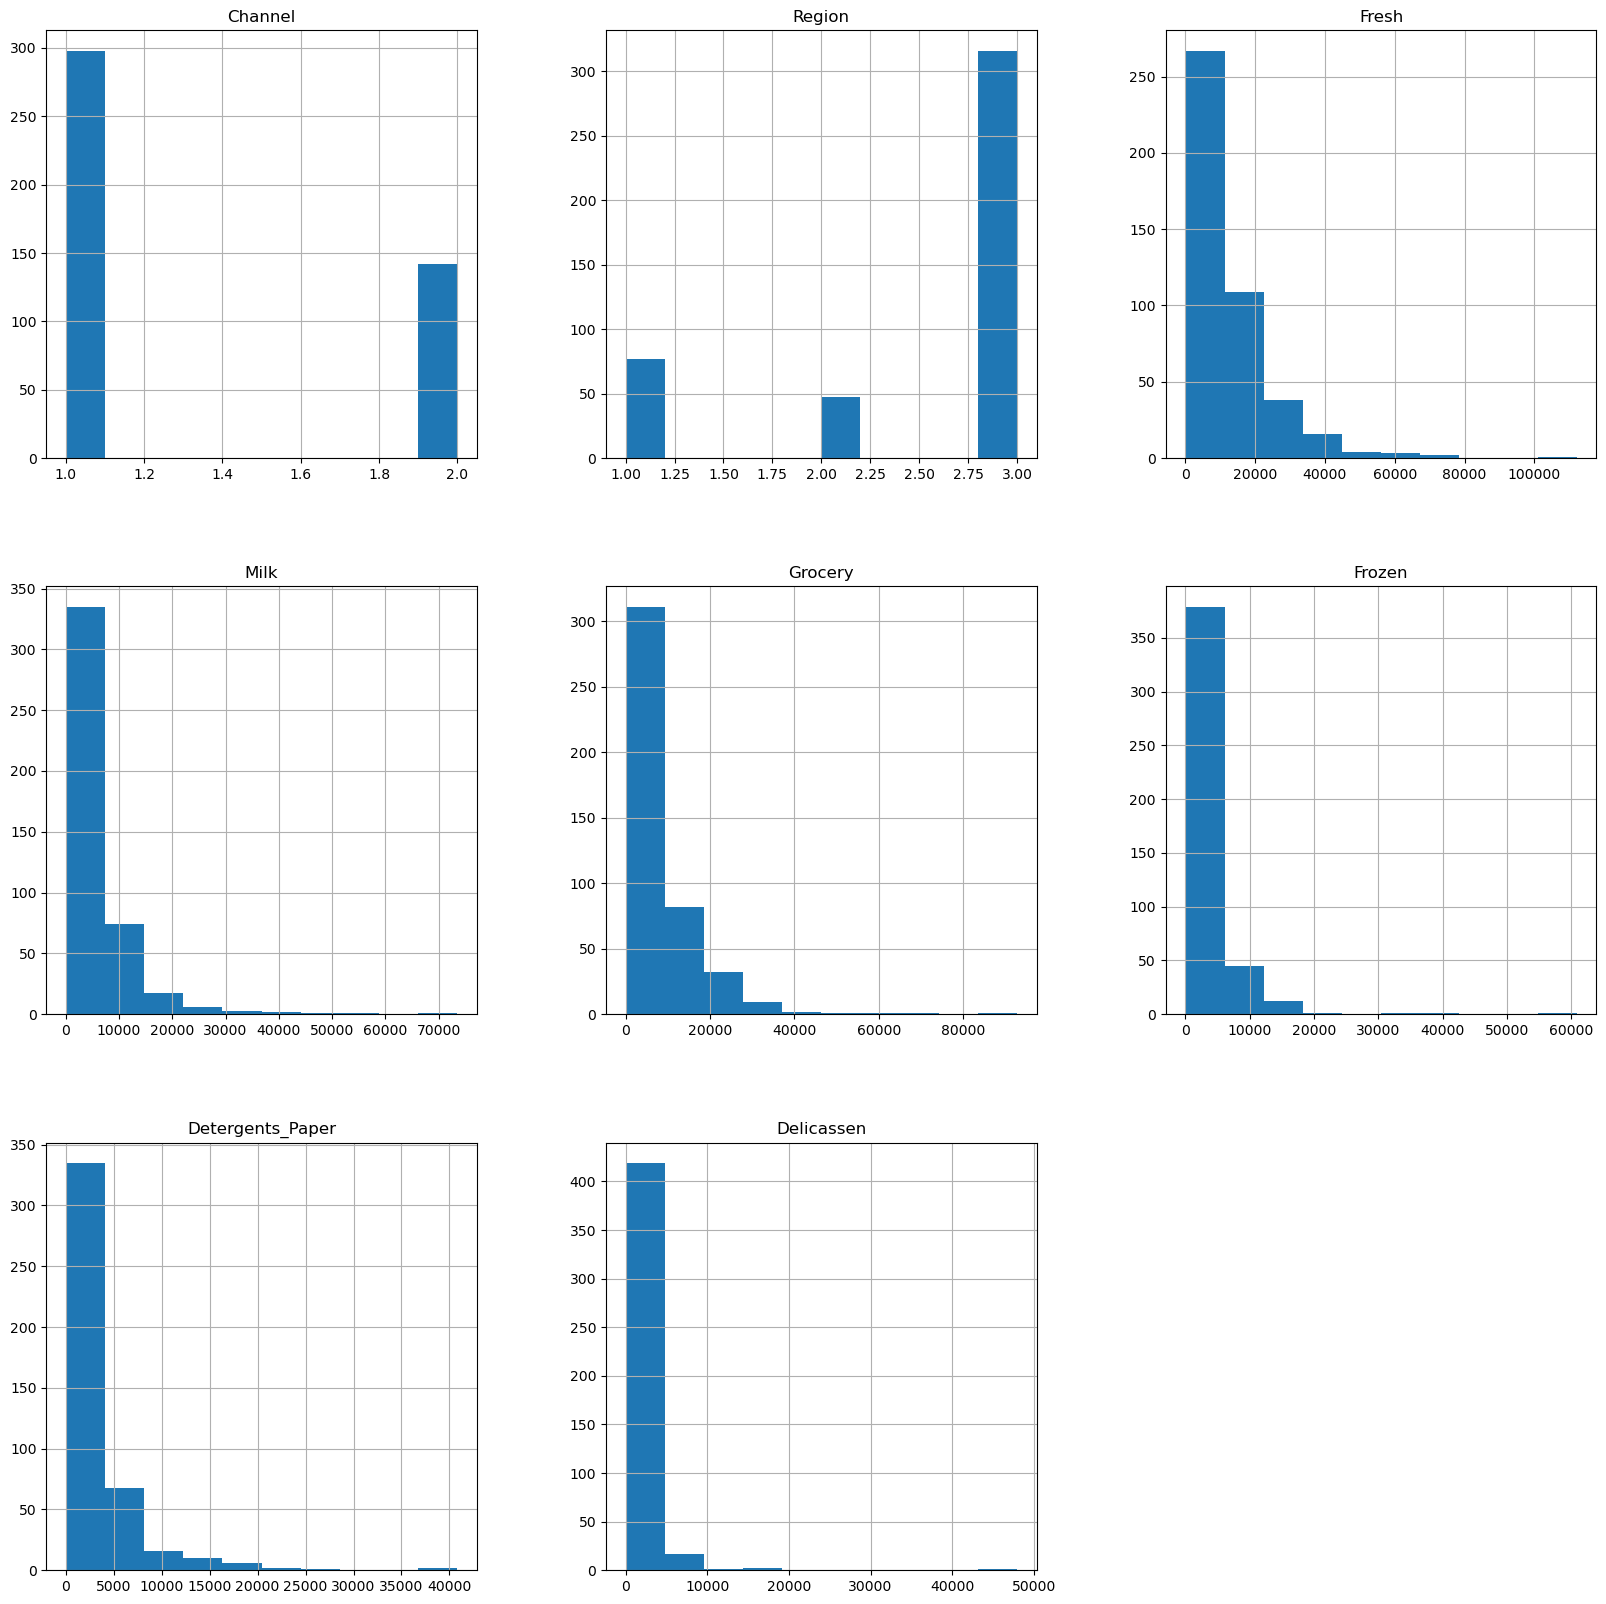

In [13]:
# Plot histograms of the numerical columns
wholesale_df.hist(figsize=(20,20))
plt.show()

In [14]:
# # Plot boxplots of the numerical columns
# fig, axes = plt.subplots(9, 4, figsize=(20,40))
# for i, col in enumerate(wholesale_df.select_dtypes(include='number').columns):
#     sns.boxplot(x=wholesale_df[col], ax=axes[i//4, i%4])
# plt.tight_layout()
# plt.show()

In [15]:
# Plot countplots of the categorical columns ==>> no categorical columns
# fig, axes = plt.subplots(6, 2, figsize=(20,30))
# for i, col in enumerate(wholesale_df.select_dtypes(include='object').columns):
#     sns.countplot(x=wholesale_df[col], ax=axes[i//2, i%2])
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

<AxesSubplot:>

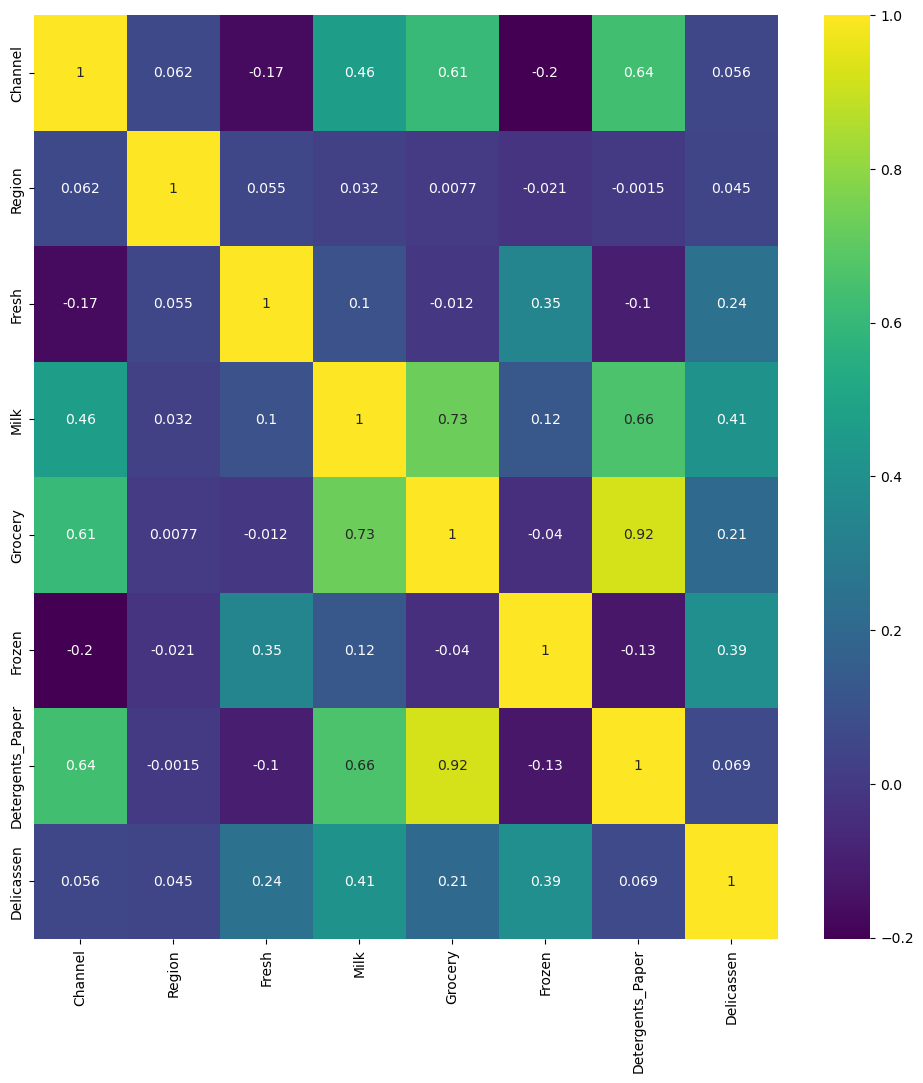

In [16]:
# Check the correlation matrix of the numerical columns
plt.figure(figsize=(12, 12))
sns.heatmap(wholesale_df.corr(), annot=True, cmap='viridis')

### Feature Engineering

In [17]:
# # Drop the index column from the datasets ==> KeyError: "['index'] not found in axis"
# wholesale_df.drop('index', axis=1, inplace=True)

In [18]:
# define the numerical columns
num_cols = wholesale_df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [19]:
# Define the categorical columns
cat_cols = wholesale_df.select_dtypes(exclude='number').columns
cat_cols

Index([], dtype='object')

###### Check the missing values in the data

In [20]:
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [21]:
# # Handle missing values in numerical columns using KNN imputation
# imputer = KNNImputer() # n_neighbors=5, 2
# wholesale_df[num_cols] = imputer.fit_transform(wholesale_df[num_cols])

###### Check the outliers in the data using boxplots

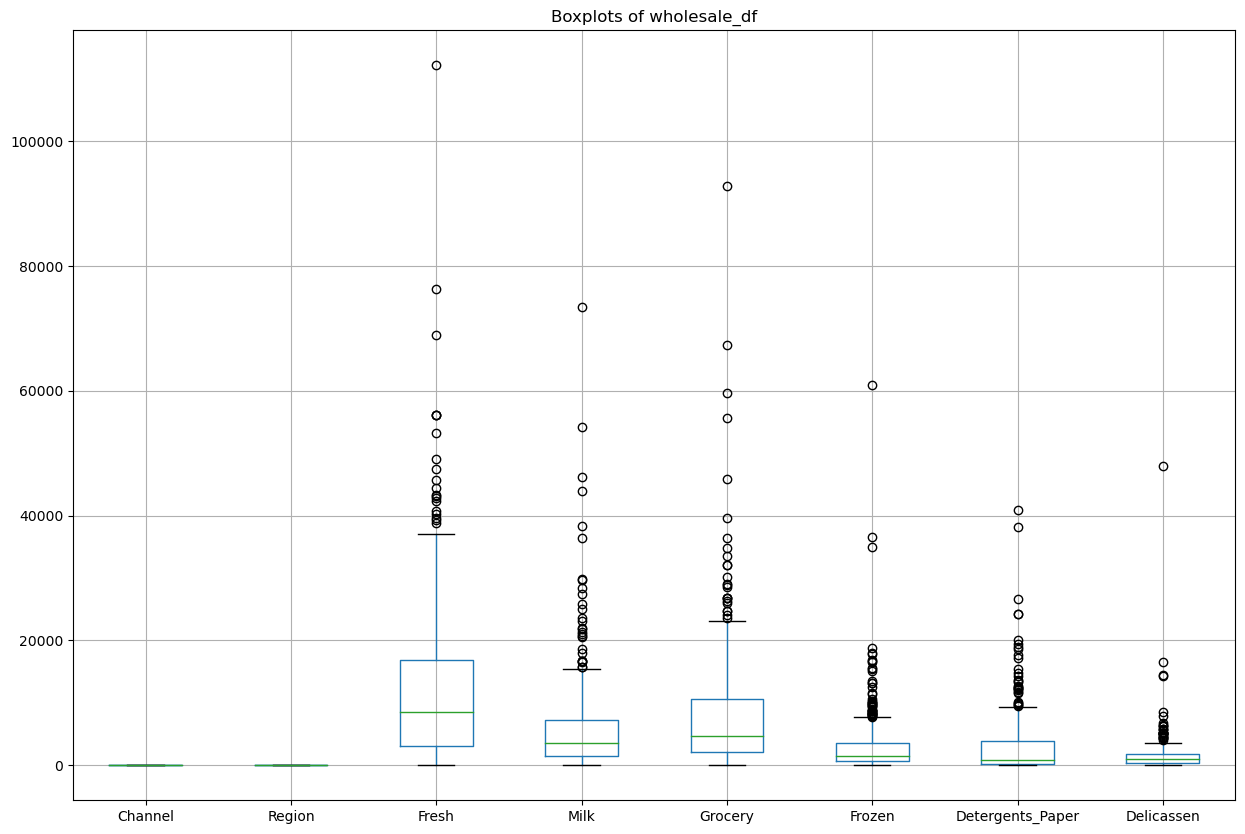

In [22]:
plt.figure(figsize=(15,10))
wholesale_df.boxplot()
plt.title('Boxplots of wholesale_df')
plt.show()

In [24]:
# Remove column Milk
wholesale_new = wholesale_df.drop('Milk',axis=1)

In [25]:
# Split the data into training and testing sets using the given feature as the target Set a random state.
X_train, X_test, y_train, y_test = train_test_split(wholesale_new, wholesale_df['Milk'], test_size=0.25, random_state=1)

In [26]:
# Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [27]:
# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.3975791311651595


### Visualize Feature Distributions

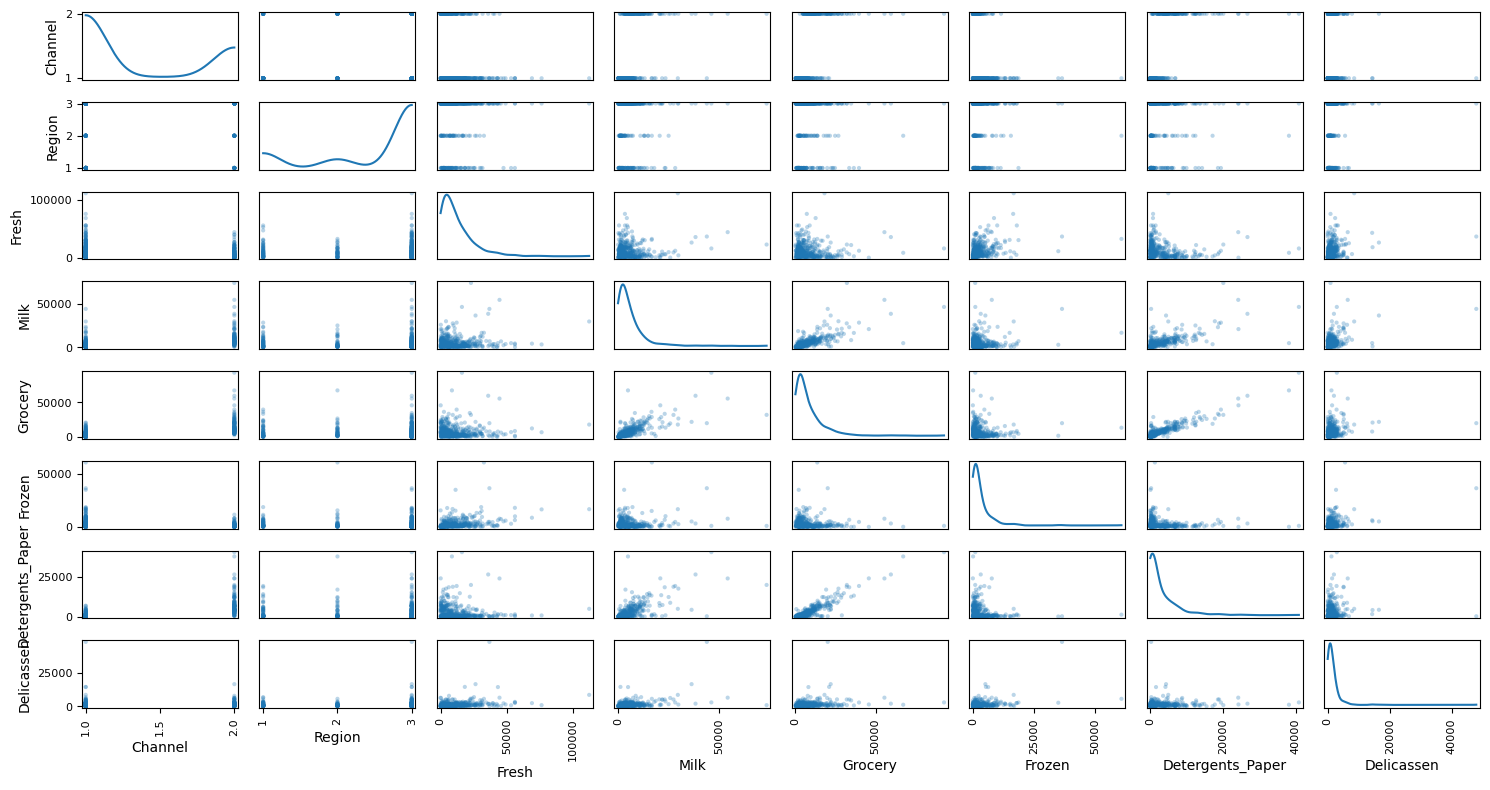

In [29]:
pd.plotting.scatter_matrix(wholesale_df, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

### Feature Scaling

In [30]:
# Scale the data using the natural logarithm
log_data = np.log(wholesale_df.copy())

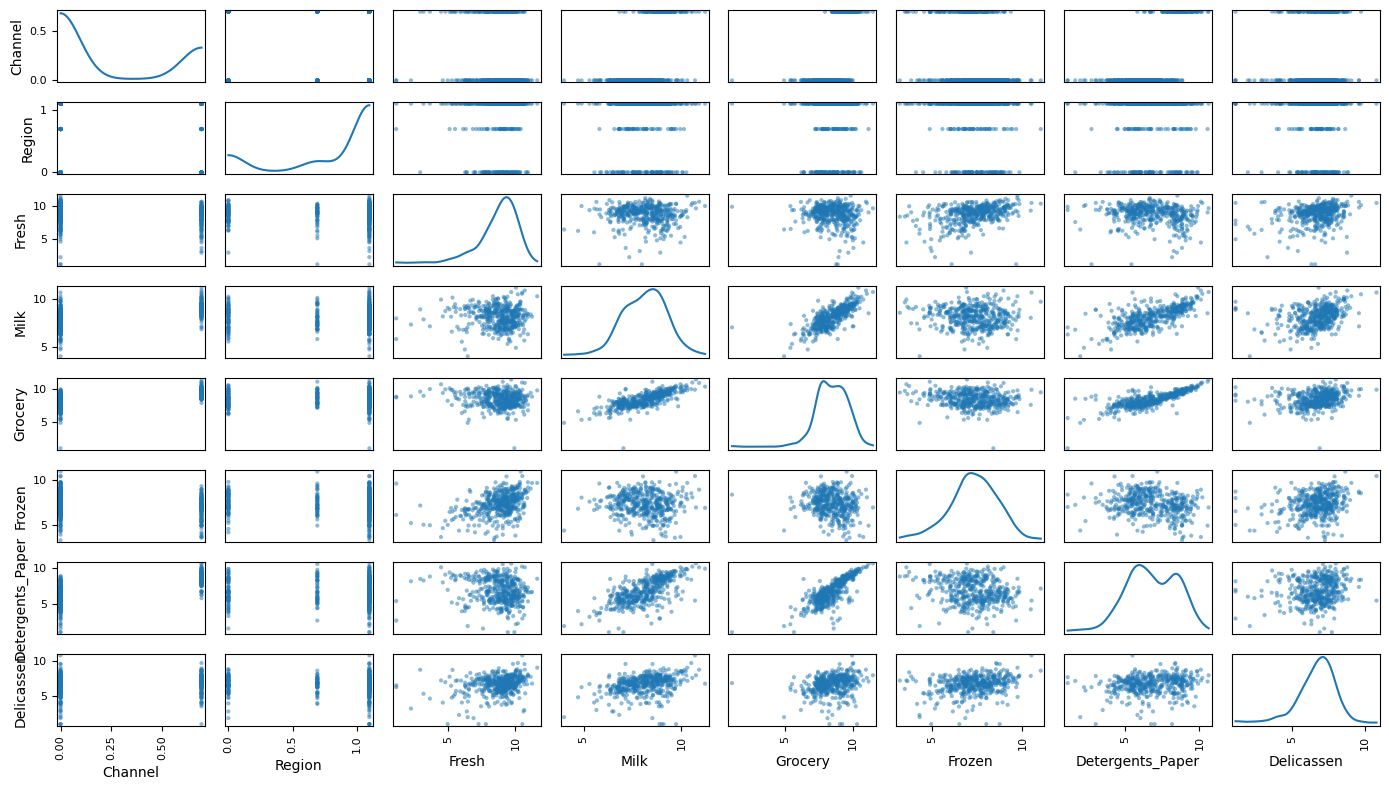

In [31]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.5, figsize=(14,8),diagonal='kde')
plt.tight_layout()

### Outlier Detection

In [38]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
# Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Select the indices for data points you wish to remove
outliers  = [66, 75, 338, 142, 154, 289]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...,...
429,0.000000,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
430,0.000000,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
431,0.693147,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
432,0.000000,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


### Feature Transformation - PCA

In [40]:
good_data.shape

(434, 8)

In [41]:
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=8)
pca.fit(good_data)

PCA(n_components=8)

In [42]:
print(pca.components_)

[[-1.16323557e-01 -8.19434813e-03  2.11359923e-01 -3.91946401e-01
  -4.37295284e-01  2.05231531e-01 -7.37216195e-01 -1.06168822e-01]
 [-4.78569503e-03  4.28453188e-03 -6.44088120e-01 -1.85199449e-01
  -1.11833896e-01 -5.10252001e-01 -8.63004357e-02 -5.20094902e-01]
 [-2.22813792e-02 -1.08174213e-02 -6.28915224e-01  6.57390079e-02
  -3.60052745e-02  8.99930714e-02 -2.68849471e-01  7.19621690e-01]
 [-7.54887270e-04 -4.03980500e-02 -3.80048901e-01  1.32387933e-02
   6.12145916e-03  8.27899149e-01  1.65476223e-01 -3.75390651e-01]
 [-1.53084607e-02  1.79097421e-02  1.08622965e-02  7.43741474e-01
   3.07525983e-01 -1.08541754e-02 -5.40410789e-01 -2.43806598e-01]
 [ 3.06226293e-02 -1.98217334e-01  1.81116440e-04 -4.90978400e-01
   8.18718600e-01  3.49372080e-02 -2.17230425e-01 -1.58381803e-03]
 [-5.20132761e-02 -9.77970053e-01  1.78302531e-02  1.14931840e-01
  -1.53154434e-01 -4.73986939e-02  4.04283127e-02  2.14069144e-03]
 [ 9.90995168e-01 -4.61430446e-02  8.36723024e-03 -1.27201326e-02
  -

In [43]:
print(pca.explained_variance_)

[4.58738954 2.78078876 1.13750117 1.01831754 0.46756948 0.19901346
 0.17268232 0.043321  ]
